In [14]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [15]:
df_all = pd.read_csv('../Processed Data/AllPlayerDataProcessed.csv').drop(columns=['Index'])
df_gk = pd.read_csv('../Processed Data/GKDataProcessed.csv').drop(columns=['Index'])
df_bk = pd.read_csv('../Processed Data/BKDataProcessed.csv').drop(columns=['Index'])
df_md = pd.read_csv('../Processed Data/MDDataProcessed.csv').drop(columns=['Index'])
df_fwd = pd.read_csv('../Processed Data/FWDDataProcessed.csv').drop(columns=['Index'])
# df = df_all
# df.head()

In [16]:
# Shape of dataframe
# print(" Shape of dataframe: ", df.shape)
# Variable inspection
# print("Names of columns ", list(df.columns))

In [17]:
# Training the linear regression model for goalkeepers
# Splitting data into attribute and target value, and then split them into training and testing sets
target = df_gk.Overall
df_gk = df_gk.drop(['Overall'], axis = 1)
X_train, X_test, y_train, y_test_gk = train_test_split(df_gk, target, test_size=0.2)

# Model for goalkeepers
GKmodel = LinearRegression()
GKmodel.fit(X_train, y_train)
predictions_gk = GKmodel.predict(X_test)

# Model performance
print('r2 score: '+str(r2_score(y_test_gk, predictions_gk)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test_gk, predictions_gk))))

r2 score: 0.9980867738109356
RMSE : 0.33614443322569487


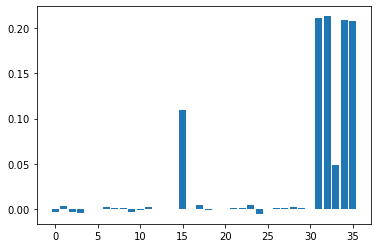

In [18]:
Y = GKmodel.coef_
X = range(len(Y))
plt.bar(X,Y)
coefs_attr = dict(zip(list(df_gk), Y))
# print(coefs_attr)

In [19]:
# Training the linear regression model for backfielders
# Splitting data into attribute and target value, and then split them into training and testing sets
target = df_bk.Overall
df_bk = df_bk.drop(['Overall'], axis = 1)
X_train, X_test, y_train, y_test_bk = train_test_split(df_bk, target, test_size=0.2)

# Model for midfielders
BKmodel = LinearRegression()
BKmodel.fit(X_train, y_train)
predictions_bk = BKmodel.predict(X_test)

# Model performance
print('r2 score: '+str(r2_score(y_test_bk, predictions_bk)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test_bk, predictions_bk))))

r2 score: 0.9553333581616297
RMSE : 1.3499349701220664


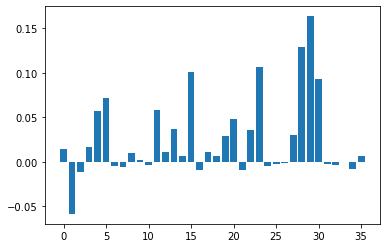

In [20]:
Y = BKmodel.coef_
X = range(len(Y))
plt.bar(X,Y)
coefs_attr = dict(zip(list(df_bk), Y))
# print(coefs_attr)

In [21]:
# Training the linear regression model for midfielders
# Splitting data into attribute and target value, and then split them into training and testing sets
target = df_md.Overall
df_md = df_md.drop(['Overall'], axis = 1)
X_train, X_test, y_train, y_test_md = train_test_split(df_md, target, test_size=0.2)

# Model for midfielders
MDmodel = LinearRegression()
MDmodel.fit(X_train, y_train)
predictions_md = MDmodel.predict(X_test)

# Model performance
print('r2 score: '+str(r2_score(y_test_md, predictions_md)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test_md, predictions_md))))

r2 score: 0.9358642432680977
RMSE : 1.7893390971642442


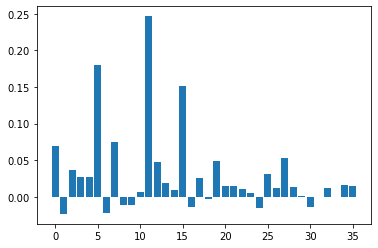

In [22]:
Y = MDmodel.coef_
X = range(len(Y))
plt.bar(X,Y)
coefs_attr = dict(zip(list(df_md), Y))
# print(coefs_attr)

In [23]:
# Training the linear regression model for strikers / forwards
# Splitting data into attribute and target value, and then split them into training and testing sets
target = df_fwd.Overall
df_fwd = df_fwd.drop(['Overall'], axis = 1)
X_train, X_test, y_train, y_test_fwd = train_test_split(df_fwd, target, test_size=0.2)

# Model for strikers
FWDmodel = LinearRegression()
FWDmodel.fit(X_train, y_train)
predictions_fwd = FWDmodel.predict(X_test)

# Model performance
print('r2 score: '+str(r2_score(y_test_fwd, predictions_fwd)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test_fwd, predictions_fwd))))

r2 score: 0.9874412253918773
RMSE : 0.7850690237219863


{'Age': -0.001648262554740794, 'Weak Foot': -0.004209430370392314, 'Crossing': -0.0003489983476354348, 'Finishing': 0.1712711867579662, 'HeadingAccuracy': 0.06957531881444351, 'ShortPassing': 0.059889300817637235, 'Volleys': 0.007756478275524036, 'Dribbling': 0.07298872100891338, 'Curve': 0.0009560957492337844, 'FKAccuracy': 0.0013586936970614032, 'LongPassing': 0.00036756452435964747, 'BallControl': 0.12380943285731141, 'Acceleration': 0.039404516931488734, 'SprintSpeed': 0.045198401196783054, 'Agility': -0.0025594793030829562, 'Reactions': 0.08781896504856017, 'Balance': -0.002139066560970913, 'ShotPower': 0.09709283745922886, 'Jumping': -0.003717685760205613, 'Stamina': 0.0019139325048876518, 'Strength': 0.04576975233214801, 'LongShots': 0.03347062010376, 'Aggression': 0.0025404700919308015, 'Interceptions': -0.0018550535469027147, 'Positioning': 0.1315056727704876, 'Vision': 0.006547713612552633, 'Penalties': 0.0014712428332260725, 'Composure': 0.00896286517404159, 'Marking': 0.004

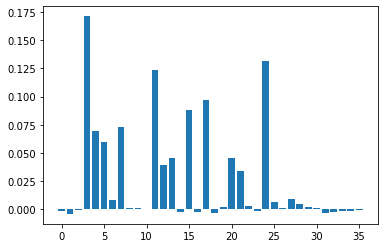

In [24]:
Y = FWDmodel.coef_
X = range(len(Y))
plt.bar(X,Y)
coefs_attr = dict(zip(list(df_fwd), Y))
print(coefs_attr)

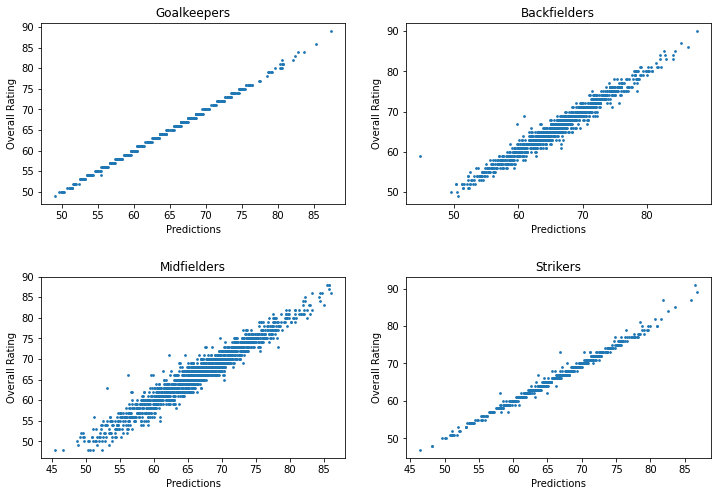

In [25]:
# Plotting each results
figs = plt.figure(figsize=(12,8))
fig_gk = figs.add_subplot(2,2,1)
fig_gk.scatter(predictions_gk, y_test_gk, s = 3)
fig_gk.set_title("Goalkeepers")
fig_gk.set_xlabel("Predictions")
fig_gk.set_ylabel("Overall Rating")
fig_bk = figs.add_subplot(2,2,2)
fig_bk.scatter(predictions_bk, y_test_bk, s = 3)
fig_bk.set_title("Backfielders")
fig_bk.set_xlabel("Predictions")
fig_bk.set_ylabel("Overall Rating")
fig_md = figs.add_subplot(2,2,3)
fig_md.scatter(predictions_md, y_test_md, s = 3)
fig_md.set_title("Midfielders")
fig_md.set_xlabel("Predictions")
fig_md.set_ylabel("Overall Rating")
fig_fwd = figs.add_subplot(2,2,4)
fig_fwd.scatter(predictions_fwd, y_test_fwd, s = 3)
fig_fwd.set_title("Strikers")
fig_fwd.set_xlabel("Predictions")
fig_fwd.set_ylabel("Overall Rating")
figs.subplots_adjust(hspace=0.4)
figs.show()

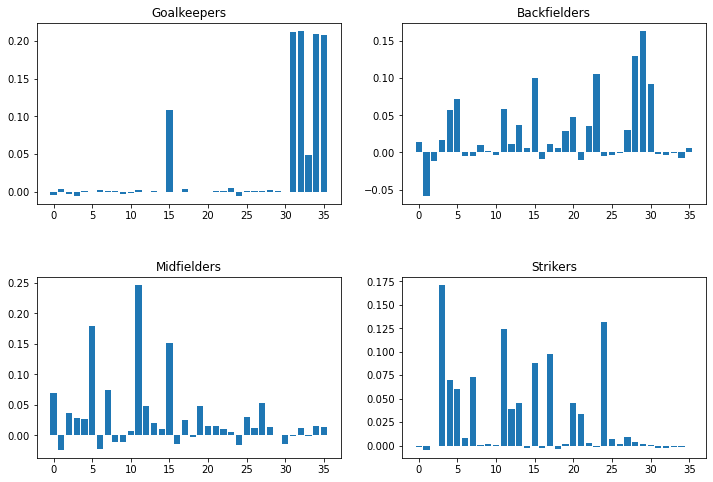

In [26]:
# Plotting coefficients for each model
figs = plt.figure(figsize=(12,8))
fig_gk = figs.add_subplot(2,2,1)
fig_gk.bar(range(len(GKmodel.coef_)),GKmodel.coef_)
fig_gk.set_title("Goalkeepers")
fig_bk = figs.add_subplot(2,2,2)
fig_bk.bar(range(len(BKmodel.coef_)),BKmodel.coef_)
fig_bk.set_title("Backfielders")
fig_md = figs.add_subplot(2,2,3)
fig_md.bar(range(len(MDmodel.coef_)),MDmodel.coef_)
fig_md.set_title("Midfielders")
fig_fwd = figs.add_subplot(2,2,4)
fig_fwd.bar(range(len(FWDmodel.coef_)),FWDmodel.coef_)
fig_fwd.set_title("Strikers")
figs.subplots_adjust(hspace=0.4)
figs.show()